#TIM AI Academy

## Demonstração 7 - Dataset para uma Empresa de Telecomunicações

Objetivo: A partir de um dataset artificial, vamos aferir a corrrelação de Pearson, construir gráficos de dispersão e comentar um pouco mais a respeito de variáveis preditoras e resposta.

### Prof. Dr. Ahirton Lopes (https://github.com/ahirtonlopes)

**Visualização dos Dados:** O DataFrame df é exibido inicialmente para verificar os dados inseridos.

**Matriz de Correlação:** A matriz de correlação é calculada e exibida usando um heatmap. Isso permite visualizar rapidamente as correlações entre todas as variáveis.

Cálculo da Correlação de Pearson: Para cada variável preditora, a correlação de Pearson com a variável resposta (churn) é calculada e exibida no console.

**Gráficos de Dispersão com Regressão:**

Utilizamos sns.regplot() para criar gráficos de dispersão com linhas de regressão logísticas.

* Esse tipo de gráfico é particularmente útil para variáveis categóricas binárias (como churn), pois ajuda a visualizar como a probabilidade de churn muda com base nas variáveis preditoras.

* Cada gráfico é configurado com títulos e rótulos de eixos adequados à análise.

In [8]:
# Importar as bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Exemplo de dados fictícios de uma empresa de telecom
data = {
    'gasto_mensal': [70, 85, 40, 100, 95, 65, 80, 90, 55, 60],
    'tempo_contrato': [24, 12, 36, 6, 48, 12, 18, 24, 6, 18],
    'numero_reclamacoes': [2, 3, 1, 5, 4, 1, 3, 4, 2, 2],
    'churn': [1, 0, 1, 1, 0, 0, 1, 0, 1, 0]  # 1 indica churn, 0 indica não churn
}

# Criar um DataFrame com os dados
df = pd.DataFrame(data)

# Visualizar os dados
print(df)

   gasto_mensal  tempo_contrato  numero_reclamacoes  churn
0            70              24                   2      1
1            85              12                   3      0
2            40              36                   1      1
3           100               6                   5      1
4            95              48                   4      0
5            65              12                   1      0
6            80              18                   3      1
7            90              24                   4      0
8            55               6                   2      1
9            60              18                   2      0


Matriz de Correlação:
                     gasto_mensal  tempo_contrato  numero_reclamacoes     churn
gasto_mensal            1.000000       -0.002597            0.914218 -0.273588
tempo_contrato         -0.002597        1.000000            0.007480 -0.189832
numero_reclamacoes      0.914218        0.007480            1.000000 -0.078811
churn                  -0.273588       -0.189832           -0.078811  1.000000


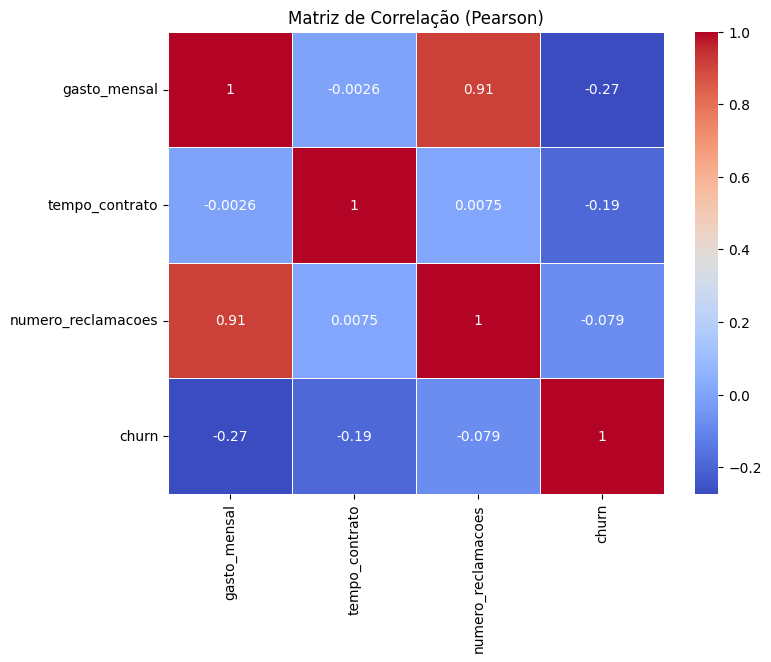

In [9]:
# Calcular a correlação de Pearson entre as variáveis preditoras e a variável resposta (churn)
correlacoes = df.corr(method='pearson')

# Exibir a matriz de correlação
print("Matriz de Correlação:\n", correlacoes)

# Visualizar a matriz de correlação usando um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlacoes, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Matriz de Correlação (Pearson)")
plt.show()

Gasto Mensal vs Churn: O gráfico mostra se existe uma tendência de que um maior gasto mensal esteja associado a uma maior probabilidade de churn. A linha de regressão ajudará a visualizar essa relação.

Tempo de Contrato vs Churn: Este gráfico pode indicar se os clientes que têm contratos mais curtos estão mais propensos a cancelar o serviço.

Número de Reclamações vs Churn: A linha de regressão permitirá observar se um aumento no número de reclamações está associado a um aumento na probabilidade de churn.

Correlação de Pearson entre gasto_mensal e churn: -0.27 (p-valor: 0.44)
Correlação de Pearson entre tempo_contrato e churn: -0.19 (p-valor: 0.60)
Correlação de Pearson entre numero_reclamacoes e churn: -0.08 (p-valor: 0.83)


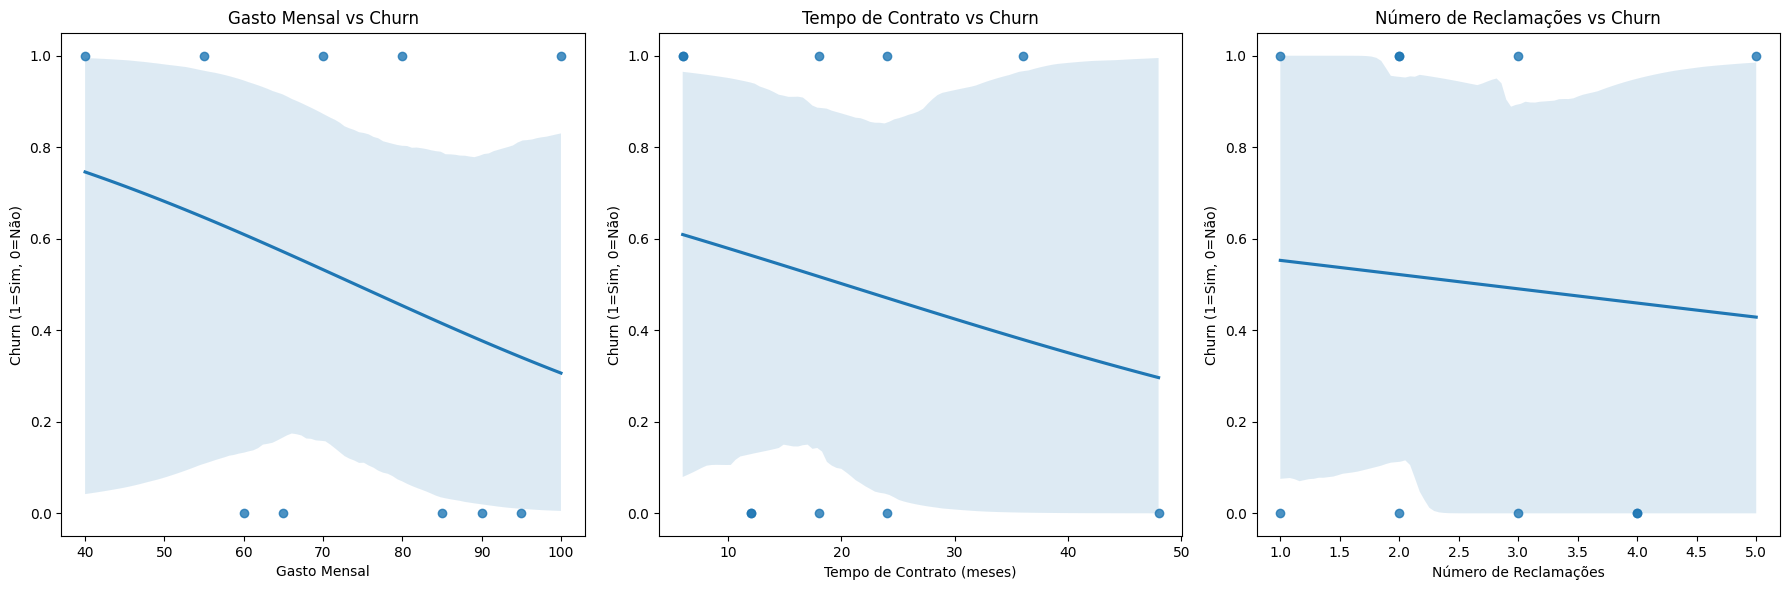

In [10]:
# Análise de correlação entre cada variável preditora e a variável resposta (churn)
for coluna in df.columns[:-1]:
    coef_pearson, p_valor = pearsonr(df[coluna], df['churn'])
    print(f"Correlação de Pearson entre {coluna} e churn: {coef_pearson:.2f} (p-valor: {p_valor:.2f})")

# Visualizar a relação entre as variáveis e a variável resposta (churn) com linhas de regressão
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Gasto Mensal vs Churn
sns.regplot(x='gasto_mensal', y='churn', data=df, ax=axs[0], logistic=True)
axs[0].set_title('Gasto Mensal vs Churn')
axs[0].set_xlabel('Gasto Mensal')
axs[0].set_ylabel('Churn (1=Sim, 0=Não)')

# Tempo de Contrato vs Churn
sns.regplot(x='tempo_contrato', y='churn', data=df, ax=axs[1], logistic=True)
axs[1].set_title('Tempo de Contrato vs Churn')
axs[1].set_xlabel('Tempo de Contrato (meses)')
axs[1].set_ylabel('Churn (1=Sim, 0=Não)')

# Número de Reclamações vs Churn
sns.regplot(x='numero_reclamacoes', y='churn', data=df, ax=axs[2], logistic=True)
axs[2].set_title('Número de Reclamações vs Churn')
axs[2].set_xlabel('Número de Reclamações')
axs[2].set_ylabel('Churn (1=Sim, 0=Não)')

plt.tight_layout()
plt.show()

A partir dessas visualizações, você poderá:

* Identificar tendências: Se as linhas de regressão se inclinam para cima ou para baixo, isso ajudará a visualizar se há uma correlação positiva ou negativa entre as variáveis.
Verificar a força da correlação: Gráficos mais densamente agrupados em torno da linha de regressão indicam uma correlação mais forte.

* Identificar outliers: Pontos que se distanciam do padrão esperado podem indicar outliers, que podem ser importantes para a análise.